# A. Assignment details

- What: Download, manipulate and merge two or more datasets from below
- How: Create functions in a python file to do this
- Show: Show how to use these python files in a notebook

More details here: reports/assignments/milestone_1/extracredit_explainer.md


## 1.1 Download data

In [ ]:
# YOUR CODE HERE
import pandas as pd

def getWorldInData(url):
    df = pd.read_csv(url, storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
    return df

numres_url = "https://ourworldindata.org/grapher/researchers-in-rd-per-million-people.csv?v=1&csvType=full&useColumnShortNames=true"
gdp_url = "https://ourworldindata.org/grapher/gdp-per-capita-maddison-project-database.csv?v=1&csvType=full&useColumnShortNames=true"

df_numres = getWorldInData(numres_url)
df_gdp = getWorldInData(gdp_url)


,Entity,Code,Year,gdp_per_capita,900793-annotations
0,Afghanistan,AFG,1950,1156.0,NaN
1,Afghanistan,AFG,1951,1170.0,NaN


## 1.2 Manipulate Data

In [ ]:
df_numres = df_numres.rename({"Code":'country', "sp_pop_scie_rd_p6":'res_per_mil', "Year":'year'}, axis=1)
df_gdp = df_gdp.rename({"Code":'country', "Year":'year'}, axis=1)


## 1.3 Merge Data

In [25]:
df_main = pd.merge(
    df_numres[['country', 'year', 'res_per_mil']], 
    df_gdp[['country', 'year', 'gdp_per_capita']],
    on=['country', 'year'],
    how='inner' 
)

#remove those with missing data points
df_main = df_main.dropna()



## Visualization

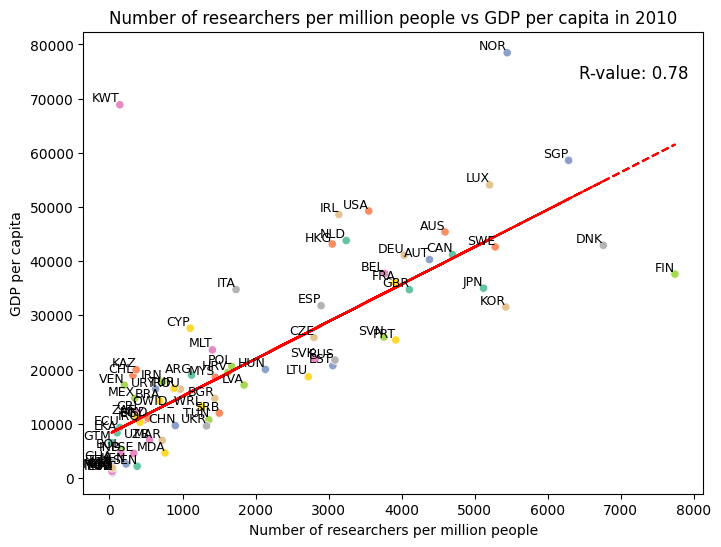

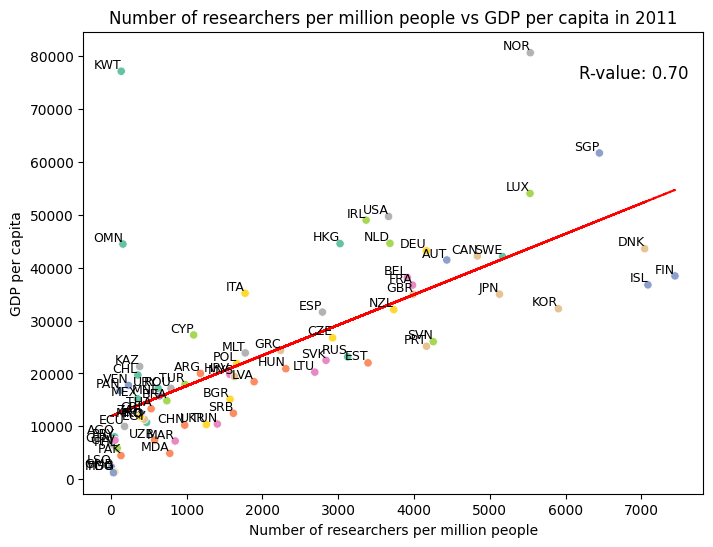

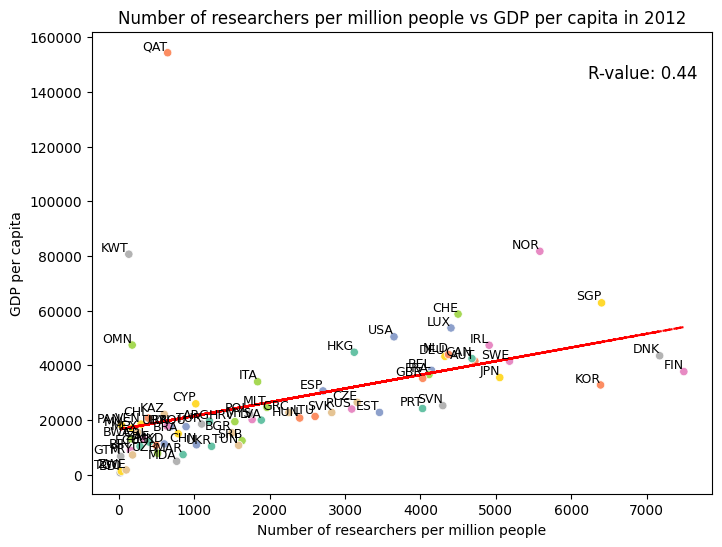

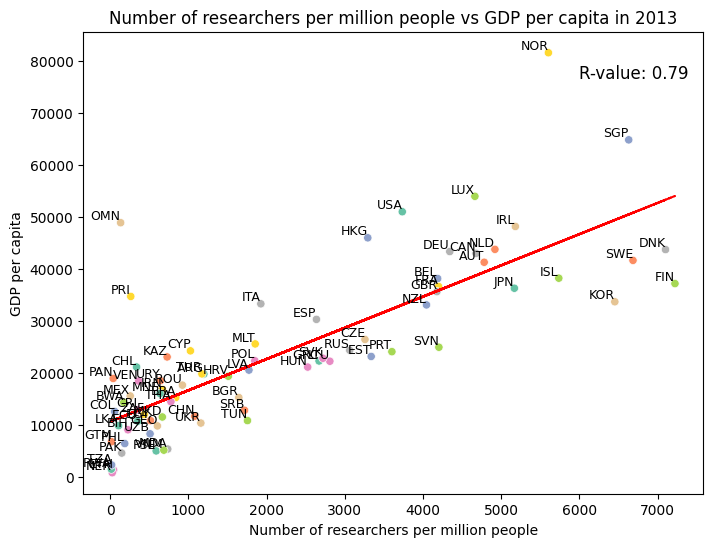

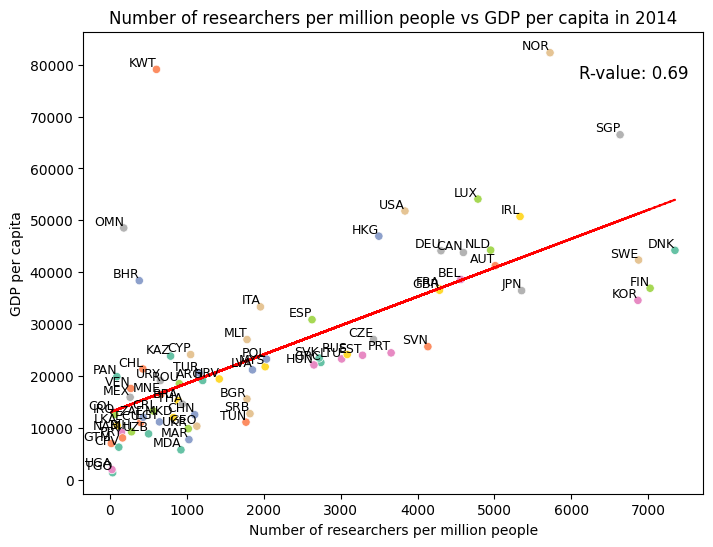

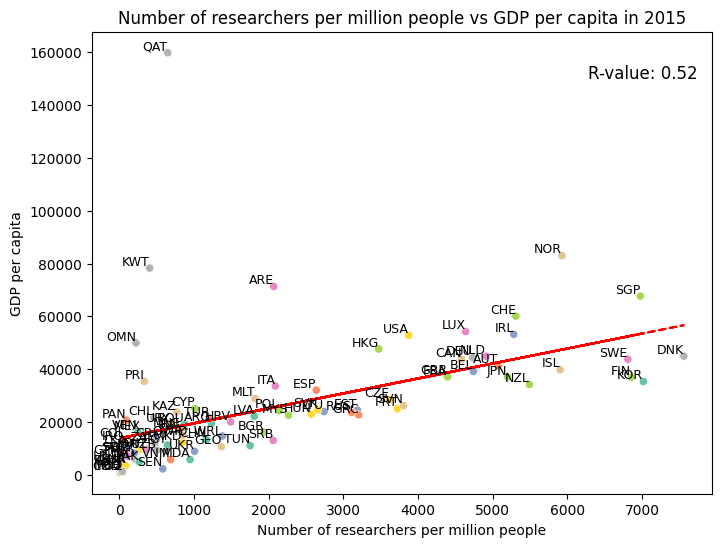

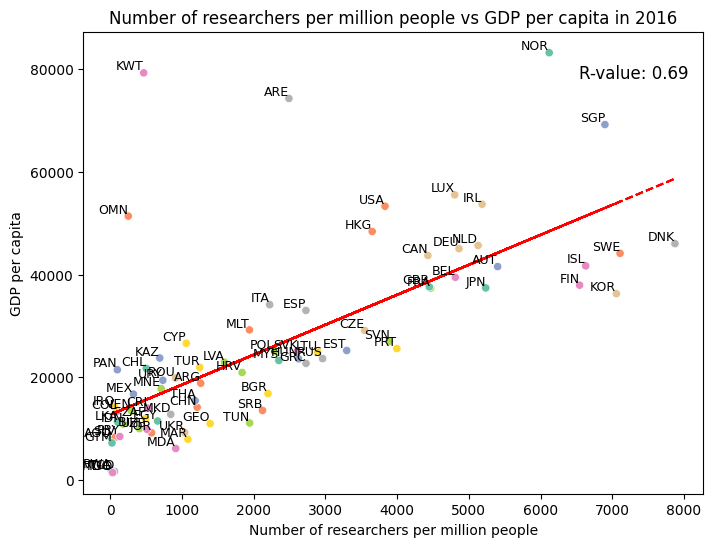

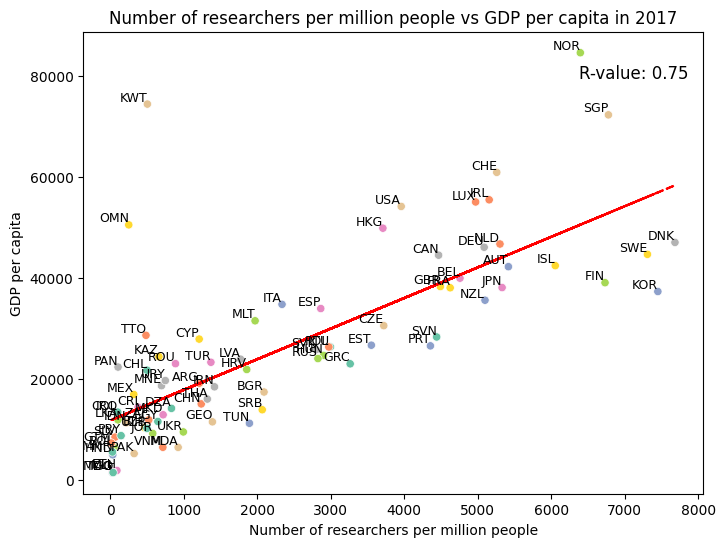

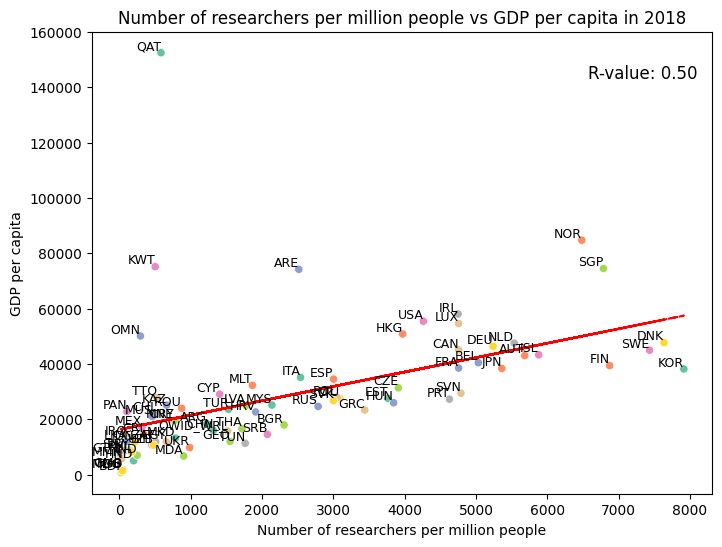

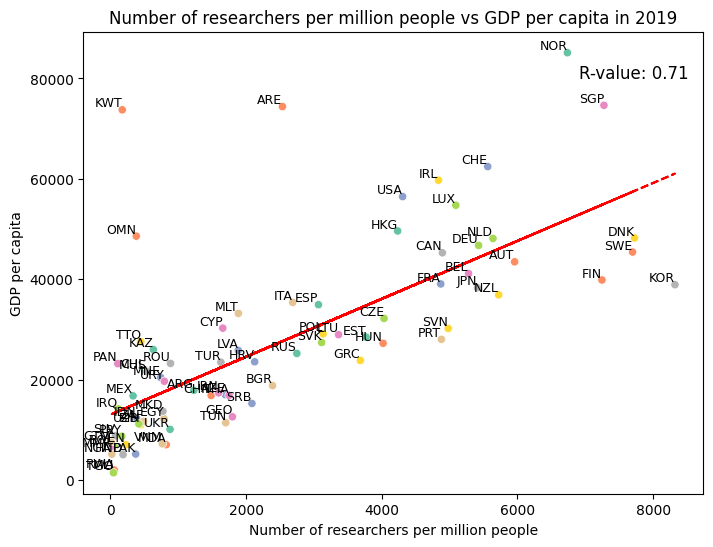

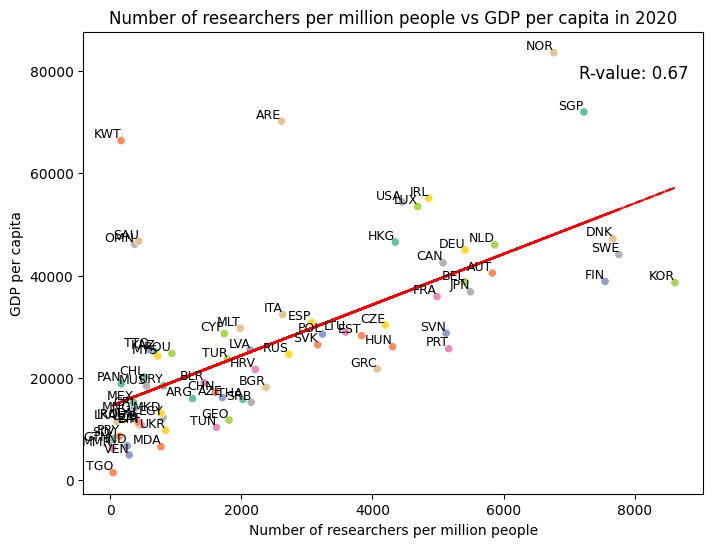

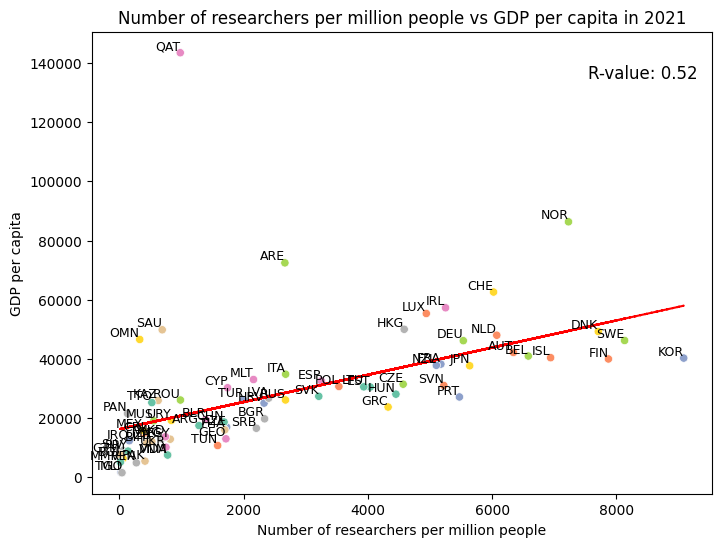

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

start_year = 2010
end_year = 2022 #end_year is excluded, last value for the for-loop is end_year - 1

for year in range(start_year, end_year): 
    
    # Filter the dataframe for the current year (all countries)
    df_filtered = df_main[df_main['year'] == year]
    
    # Skip the loop iteration if there's no data for that year
    if df_filtered.empty:
        continue

    # Plot for the current year, color by 'country'
    plt.figure(figsize=(8,6))
    ax = sns.scatterplot(data=df_filtered, x='res_per_mil', y='gdp_per_capita', hue='country', palette='Set2', legend=False)

    # Calculate the regression line and coefficient using scipy's linregress
    slope, intercept, r_value, p_value, std_err = linregress(df_filtered['res_per_mil'], df_filtered['gdp_per_capita'])
    
    # Plot the regression line
    x_vals = df_filtered['res_per_mil']
    y_vals = slope * x_vals + intercept
    ax.plot(x_vals, y_vals, color='red', linestyle='--', label=f'Reg. line (Slope: {slope:.2f})')
    
    # Annotate the R-value (correlation coefficient); place on the upper right
    ax.text(0.8, 0.9, f'R-value: {r_value:.2f}', transform=ax.transAxes, fontsize=12, color='black')

    # Annotate each point with its country code (ISO code)
    for i in range(len(df_filtered)):
        ax.text(
            df_filtered['res_per_mil'].iloc[i],  # x position
            df_filtered['gdp_per_capita'].iloc[i],  # y position
            df_filtered['country'].iloc[i],  # Country code (ISO)
            fontsize=9,  # Adjust font size if necessary
            ha='right',  # Horizontal alignment of text
            va='bottom',  # Vertical alignment of text
            color='black'  # Color of the text
        )

    plt.xlabel('Number of researchers per million people')
    plt.ylabel('GDP per capita')
    plt.title(f'Number of researchers per million people vs GDP per capita ({year})')
    plt.grid(False)
    plt.show()



## Global datasets

- What: Download, manipulate and merge two or more datasets from below
- How: Create functions in a python file to do this
- Show: Show how to use these python files in a notebook

* **Penn World Table (PWT):** Provides purchasing power parity and national income accounts data.
    * **Link:** [http://www.ggdc.net/pwt](http://www.ggdc.net/pwt)

* **UNCTADstat (UNCTAD):** Offers data on trade, investment, and development.
    * **Link:** [https://unctadstat.unctad.org/](https://unctadstat.unctad.org/)

* **FAOSTAT (FAO):** Provides data on food, agriculture, forestry, and related areas.
    * **Link:** [http://www.fao.org/faostat/en/#data](http://www.fao.org/faostat/en/#data)

* **ILOSTAT (ILO):** Offers labor statistics, including employment and wages.
    * **Link:** [https://ilostat.ilo.org/](https://ilostat.ilo.org/)

* **Federal Reserve Economic Data (FRED):** Economic and financial data from the Federal Reserve.
    * **Link:** [https://fred.stlouisfed.org/](https://fred.stlouisfed.org/)

* **Bank for International Settlements (BIS):** Data and statistics on banking, financial markets, and the global economy.
    * **Link:** [https://www.bis.org/statistics/index.htm](https://www.bis.org/statistics/index.htm)

* **International Monetary Fund (IMF) Data:** A variety of macroeconomic and financial data.
    * **Link:** [https://www.imf.org/en/data](https://www.imf.org/en/data)

* **Eurostat:** Provides a wide range of statistics on the European Union, including economic, social, and demographic data.
    * **Link:** [https://ec.europa.eu/eurostat/](https://ec.europa.eu/eurostat/)

* **World Bank Data:** Comprehensive data on development indicators across countries.
    * **Link:** [https://data.worldbank.org/](https://data.worldbank.org/)

* **Varieties of Democracy (V-Dem):** Datasets measuring various aspects of democracy across countries.
    * **Link:** [https://v-dem.net/](https://v-dem.net/)

* **OECD Data:** Statistics and indicators from the Organisation for Economic Co-operation and Development, covering a broad range of topics.
    * **Link:** [https://data.oecd.org/](https://data.oecd.org/)

* **Quality of Government (QoG):** Datasets on governance, institutions, and quality of government.
    * **Link:** [https://qog.gu.se/](https://qog.gu.se/)

* **IPCC Data:** Climate change data and scenarios from the Intergovernmental Panel on Climate Change.
    * (Note: Access to data varies, often through specific reports or data portals linked within the IPCC website)
    * **Link:** [https://www.ipcc.ch/](https://www.ipcc.ch/)

* **Our World in Data:** Research and data on global development, poverty, health, and other topics.
    * **Link:** [https://ourworldindata.org/](https://ourworldindata.org/)

* **UN Comtrade:** United Nations Commodity Trade Statistics Database.
    * **Link:** [https://comtrade.un.org/](https://comtrade.un.org/)


## Academic datasets

* **Dallas Fed Global Economic Indicators (DGEI):** [DGEI](https://www.dallasfed.org/research/international/dgei)
* **Dallas Fed International House Price Database:** [House Price](https://www.dallasfed.org/research/international/houseprice#data)
* **New York Fed r* (Natural Rate of Interest):** [r*](https://www.newyorkfed.org/research/policy/rstar)
* **Chinn-Ito Index (KAOPEN):** [KAOPEN](https://web.pdx.edu/~ito/Chinn-Ito_website.htm)
* **Metrick-Schmelzing Paper and Database (Long-Term Real Rates):** [Real Rates](https://som.yale.edu/centers/program-on-financial-stability/metrick-schmelzing-paper-and-database)
* **Yale Program on Financial Stability COVID-19 Tracker:** [COVID-19 Tracker](https://som.yale.edu/centers/program-on-financial-stability/covid-19-tracker)
* **IMF Financial Integration:** [Financial Integration](https://www.imf.org/en/Publications/WP/Issues/2017/05/10/International-Financial-Integration-in-the-Aftermath-of-the-Global-Financial-Crisis-44906)
* **IMF Macroprudential Policy Survey:** [Macroprudential](https://www.elibrary-areaer.imf.org/Macroprudential/Pages/Home.aspx)
* **Nancy Xu's Risk Aversion Index:** [Risk Aversion](https://www.nancyxu.net/risk-aversion-index)
* **Jorda-Schularick-Taylor Macrohistory Database:** [Macrohistory](https://www.nber.org/research/data/jorda-schularick-taylor-macrohistory)
* **Central Bank Independence (CBI) Data:** [CBI Data](https://sites.google.com/site/carogarriga/cbi-data-1)
* **Global Inflation Data:** [Inflation Data](https://www.worldbank.org/en/research/brief/inflation-database)

## U.S Datasets
- https://www.sca.isr.umich.edu/tables.html
- https://www.bea.gov/data
- https://www.bls.gov/jlt/
- https://adpemploymentreport.com/

## Japan datasets

* **Economy Watchers Survey (Cabinet Office):** [Watchers Survey](https://www5.cao.go.jp/keizai3/watcher.html)
* **Consumption Trend Index (ESRI, Cabinet Office):** [Consumption Index](https://www.esri.cao.go.jp/en/stat/shouhi/shouhi-e.html)
* **Prefectural Accounts (ESRI, Cabinet Office):** [Prefectural Accounts](https://www.esri.cao.go.jp/jp/sna/sonota/kenmin/kenmin_top.html)
* **Insurance Statistics (General Insurance Association of Japan):** [Insurance Stats](https://www.sonpo.or.jp/en/statistics/index.html)
* **FSA Policy Response (Financial Services Agency):** [FSA Response](https://www.fsa.go.jp/news/r1/20200313-2.html)
* **Franchise Industry Data (Japan Franchise Association):** [Franchise Data](https://www.jfnet.or.jp/data/data_c.html)
* **Trends Foreign Visitors (MLIT, Japan Tourism Agency):** [Visitor Spending](https://www.mlit.go.jp/kankocho/tokei_hakusyo/gaikokujinshohidoko.html)
* **Tax and Stamp Revenues (Ministry of Finance):** [Tax Revenues](https://www.mof.go.jp/tax_policy/reference/taxes_and_stamp_revenues/data.htm)
* **Life Insurance Statistics (Life Insurance Association of Japan):** [Life Insurance](https://www.seiho.or.jp/english/statistics/)
* **Economic Growth (Tokyo Foundation for Policy Research):** [GDP](https://www.tkfd.or.jp/research/detail.php?id=2983)
* **Consumer Price Index (Statistics Bureau of Japan):** [CPI](https://www.stat.go.jp/english/data/cpi/1588.html#his)
* **Bank Financial Statements (Financial Services Agency):** [Bank Statements](https://www.fsa.go.jp/status/ginkou_kessan/index.html)
* **Budget Revenue and Expenditure (Ministry of Finance):** [Budget Data](https://www.mof.go.jp/policy/budget/report/revenue_and_expenditure/index.htm)
* **Trade Statistics (Japan Customs):** [Trade Stats](https://www.customs.go.jp/toukei/info/index_e.htm)
* **Banking Statistics (Japanese Bankers Association):** [Banking Stats](https://www.zenginkyo.or.jp/stats/year2-02/)
* **Household Expenditure Survey (Statistics Bureau):** [Household Spending](https://www.stat.go.jp/data/kakei/longtime/index.html#time)
* **Economic Statistics (Federation of Economic Organizations):** [Econ Stats](https://www.zenkeijikyo.or.jp/statistics)
* **Regional Banks:** [Regional Banks data](https://www.chiginkyo.or.jp/news_topics/)
* **Japan Economic Policy Uncertainty Index:** [Policy Uncertainty](https://www.policyuncertainty.com/japan_monthly.html)